<a href="https://colab.research.google.com/github/AimoneCG/Proyecto-CoderHouse-Data-Science-I-Fundamentos-para-la-Ciencia-de-Datos/blob/main/ProyectoDS_Entrega_Final_Aimone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega Final** -  Cristian Aimone
# Data Science I : Fundamentos para la Ciencia de Datos
# Comisión 61675
### Fecha: 04/11/2024


# Metadata


### Abstract

- El dataset elegido contiene una visión global de los estudiantes matriculados en diversas titulaciones de grado ofrecidas en una institución de enseñanza superior.
- Incluye datos demográficos, factores socioeconómicos e información sobre el rendimiento académico que pueden utilizarse para analizar los posibles factores predictivos del abandono y el éxito académico de los estudiantes.
- Este conjunto de datos contiene múltiples bases de datos disjuntas compuestas por información relevante disponible en el momento de la matriculación, como el modo de solicitud, el estado civil, el curso elegido, etc. Además, estos datos pueden utilizarse para estimar el rendimiento global de los estudiantes al final de cada semestre mediante la evaluación de las unidades curriculares acreditadas/matriculadas/evaluadas/aprobadas, así como sus respectivas calificaciones.
- Por último, disponemos de la tasa de desempleo, la tasa de inflación y el PIB de la región, que pueden llegar a ayudarnos a comprender mejor cómo influyen los factores económicos en las tasas de abandono escolar o en los resultados académicos.
- El análisis se realizará desde el punto de vista de una institución educativa cn el fin de obtener valiosa información sobre lo que motiva a los estudiantes a permanecer en la escuela o abandonar sus estudios para una amplia gama de disciplinas como agronomía, diseño, educación enfermería periodismo gestión servicio social o tecnologías


- Este conjunto de datos fue obtenido de : [https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention] .

# Hipótesis

**Contexto Empresarial:** Dentro del contexto del negocio de la educación superior, las instituciones estan muy interesadas en responder las siguiente preguntas:
* ¿Qué características son más predictivas del abandono estudiantil?
* ¿Qué puede hacer la institución para abordar estos factores?

Con la información aportada por el dataset se puede sostener una hipótesis que el avandono de los estudiantes esta directamente realcionado a cuestiones ecónomicas que hacen que no se disponga del tiempo neceario para los estudios. Dentro de esta hipótesis factores como la edad y género, asi como el estado marital y el turno en el que cursan determinas el posible éxito de los estudiantes.
También se agregá a la hipótesis los factores económico como si tienen deuda o si están al dia con la matricula, tambien si tienen una beca.

# Objetivos



*   Analizar desde el punto de vista de la institución educativa cuales son los factores que hacen que los estudiantes sigan con sus estudios, o los abandonen
*   Poder determinar por el análisis de los datos cuales son las condiciones que se cumplen para el exito en las carreras de mayor cantidad de alumnos que continuan para ver si se pueden replicar con los alumnos de otras carreras






# Usuario final del Proyecto

El análisis está destinado a la institución educativa que aporta los datos.

# Diccionario de Variables

- Marital status => Estado civil: Estado civil del alumno.
(Categórico)
- Application mode => Modo de solicitud: El método de solicitud utilizado por el estudiante. (Categórica)
- Application order => Orden de solicitud: El orden en que el estudiante presentó la solicitud. (Numérico)
- Course => Curso: Curso realizado por el estudiante. (Categórico)
- Daytime/evening attendance => Asistencia diurna/noche: Si el alumno asiste a clase durante el día o por la noche. (Categórico)
- Previous qualification => Titulación previa: La titulación obtenida por el estudiante antes de matricularse en la enseñanza superior. (Categórica)
- Nacionality => Nacionalidad: Nacionalidad del estudiante. (Categórica)
- Mother's qualification => Titulación de la madre: Titulación de la madre del estudiante. (Categórica)
- Father's qualification => Titulación del padre: Titulación del padre del alumno. (Categórica)
- Mother's occupation => Profesión de la madre: Profesión de la madre del estudiante. (Categórica)
- Father's occupation => Profesión del padre: Profesión del padre del alumno. (Categórica)
- Displaced => Desplazado: Si el estudiante es una persona desplazada. (Categórica)
- Educational special needs => Necesidades educativas especiales: Si el alumno tiene necesidades educativas especiales. (Categórico)
- Debtor => Deudor: Si el estudiante es deudor. (Categórico)
- Tuition fees up to date => Pago al día: Si las colegiaturas del estudiante están al día. (Categórico)
- Gender => Género: Genero o sexo del estudiante. (Categórico)
- Scholarship holder => Becario: Si el estudiante es becario. (Categórico)
- Age at enrollment => Edad de inscripción: Edad del estudiante en el momento de la inscripción. (Numérico)
- International => Internacional: Si el estudiante es internacional. (Categórico)
- Curricular units 1st sem (credited) => Unidades curriculares 1er sem (acreditadas): El número de unidades curriculares acreditadas por el estudiante en el primer semestre. (Numérico)
- Curricular units 1st sem (enrolled) => Unidades curriculares 1er sem (matriculadas): Número de unidades curriculares matriculadas por el alumno en el primer semestre. (Numérico)
- Curricular units 1st sem (evaluations) => Unidades curriculares 1er sem (evaluaciones): Número de unidades curriculares evaluadas por el alumno en el primer semestre. (Numérico)
- Curricular units 1st sem (approved) => Unidades curriculares 1er sem (aprobadas): Número de unidades curriculares aprobadas por el alumno en el primer semestre. (Numérico)

#Importación de librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



#Importación del dataset desde github

In [5]:
url = "https://raw.githubusercontent.com/AimoneCG/Proyecto-CoderHouse-Data-Science-I-Fundamentos-para-la-Ciencia-de-Datos/main/dataset.csv"

df = pd.read_csv(url)

# Pre visualización del dataset

*   Analizamos la cabezera con el metodo head




In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate




*   Se analiza la dimensionalidad del dataset usando el método shape




In [7]:
df.shape

(4424, 35)

El dataset contiene 4424 filas y 35 columnas.
Se puede apreciar que contiene tanto variables categóricas como númericas



*   Utilizo el método info para observar existencia de datos nulos y no nulos



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

El dataset no contiene valores nulos



*   Mediante el método describe para realizar un resumen estadístico del dataframe


In [9]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# EDA - Análisis exploratorio de los datos

* Imprimimos las columnas para tener los nombres

In [10]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Histograma para todas las variables

* Utilizo el histograma para ver el comportamiento de cada variable respecto del conteo para conocer su distribución

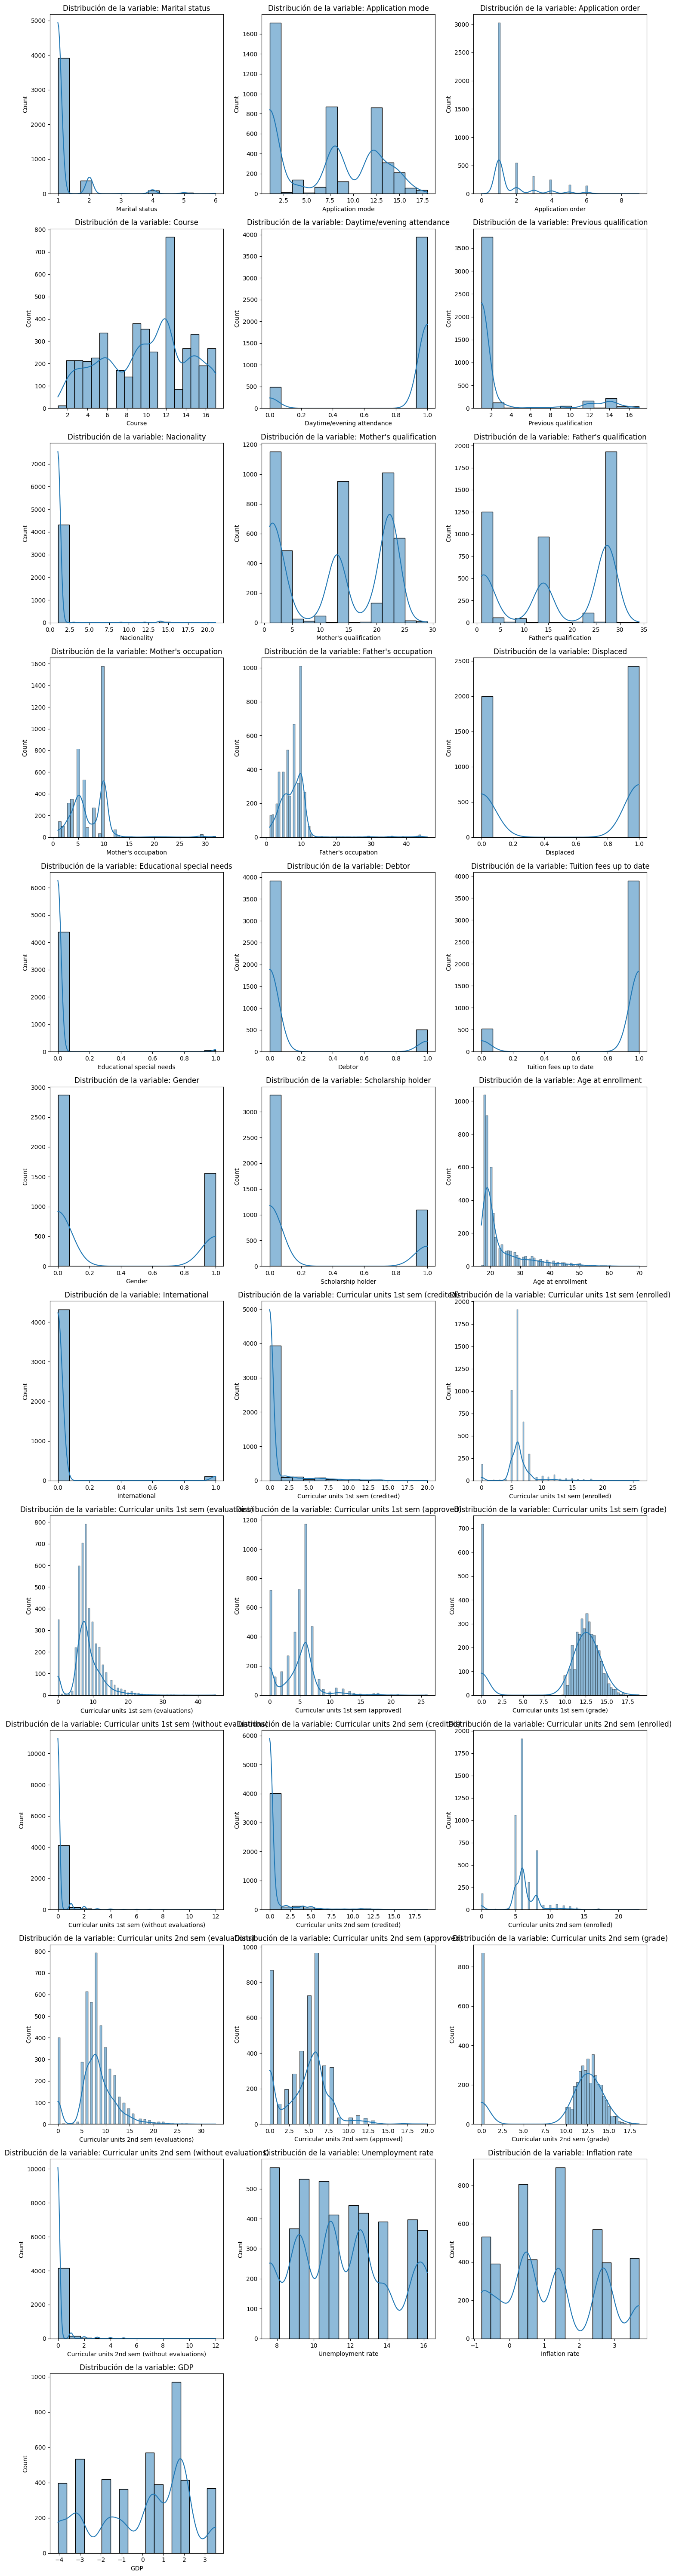

In [11]:
numerical_features = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
cols = 3  # para mostrar 3 columnas por fila
rows = (num_plots + cols - 1) // cols  # para alcular el numero de filas

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # ajustar el tamaño

for i, feature in enumerate(numerical_features):
  row_index = i // cols
  col_index = i % cols

  sns.histplot(x=feature, data=df, kde=True, ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(f"Distribución de la variable: {feature}")

# para remover subplots no utilizados
for i in range(num_plots, rows * cols):
  row_index = i // cols
  col_index = i % cols
  fig.delaxes(axes[row_index, col_index])

plt.tight_layout()  # Ajusta los parametros para mostrarlos mas ajustados
plt.show()

#Gráficos

# Histograma para ver la distribución de la Edad al momento de inscripción

Hipotesis: Se estima que la mayoria de los estudiantes se inscriben en la universidad antes de los 25 años.

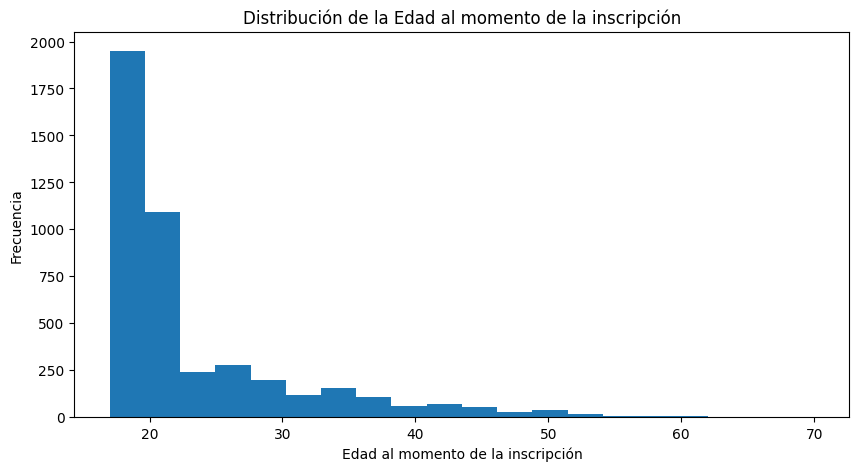

In [12]:
# Matplotlib: Univariado
plt.figure(figsize=(10, 5))
plt.hist(df['Age at enrollment'], bins=20)
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad al momento de la inscripción')
plt.show()

# Interpretación

* Como era de suponer la mayoria de los estudiantes ingresan a la universidad antes de los 25 años
* Se confirma la hipotesis

# Grafico de Torta: Distribución por género

Se busca ver si en el universo del dataset estan representados ambos generos por igual

Hipótesis: Se estima que la cantidad de hombres y mujeres es equilibrada, y eso dará a la postre una información de que género abandona la cursada o no aprueba

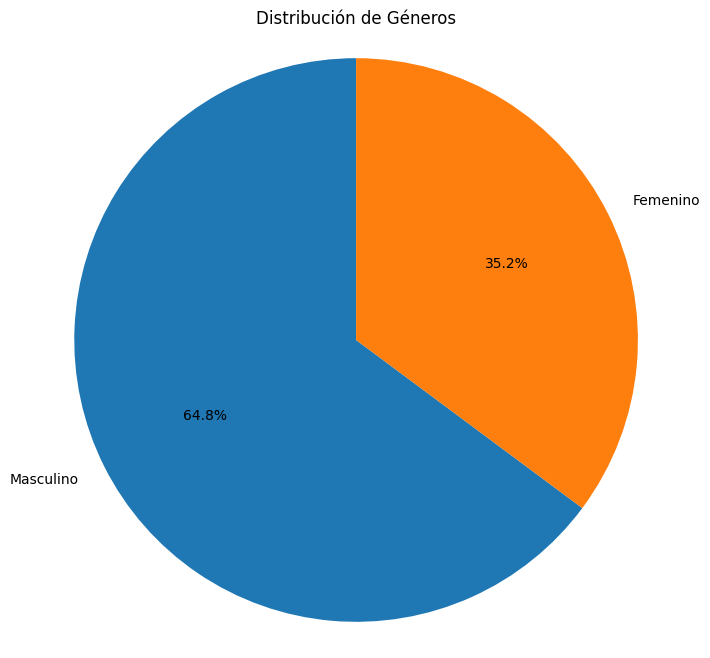

In [13]:
# Pie chet de Mathplotlib mostrando la distribución por cantidad de cada genero, siendo el valor 0 = Masculino y 1= Femenino

# Para ontar la cantidad de estudiantes de cada género
genero_counts = df['Gender'].value_counts()

# Para crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(genero_counts, labels=['Masculino', 'Femenino'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Géneros')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Interpretación:

* No se puede confirmar la hipótesis ya que el porcentaje de hombres es mayor al de las mujeres ( Aprox. 65% Vs 35%)

# Diagrama de dispersión para ver la relación entre la edad y las unidades aprobadas (1° Sem)

Hipótesis: se cree que a mayor edad costará mas aprobar las materias del primer semestre ya que posiblemente otras responsabilidades de personas adultas como el trabajo o la familia hacen mas dificil tener tiempo para estudiar apropiadamente

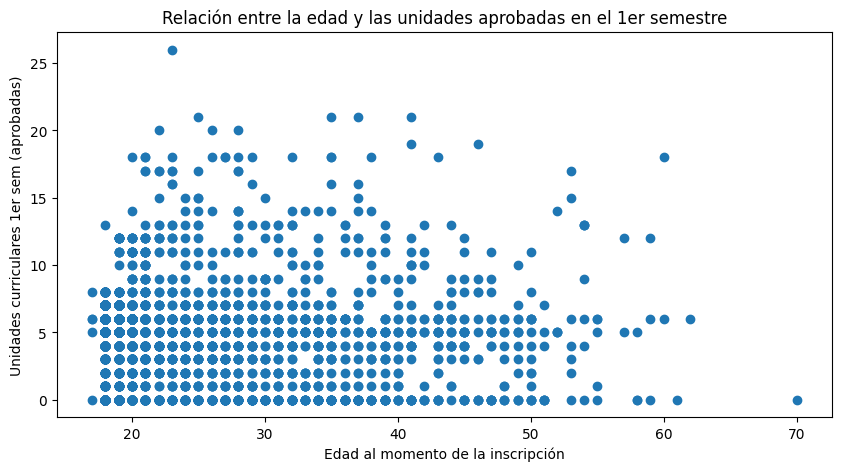

In [14]:
# Matplotlib: Bivariado
plt.figure(figsize=(10, 5))
plt.scatter(df['Age at enrollment'], df['Curricular units 1st sem (approved)'])
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Unidades curriculares 1er sem (aprobadas)')
plt.title('Relación entre la edad y las unidades aprobadas en el 1er semestre')
plt.show()

# **Se realiza el mismo gráfico en Seaborn adicionando la diferenciación por género**

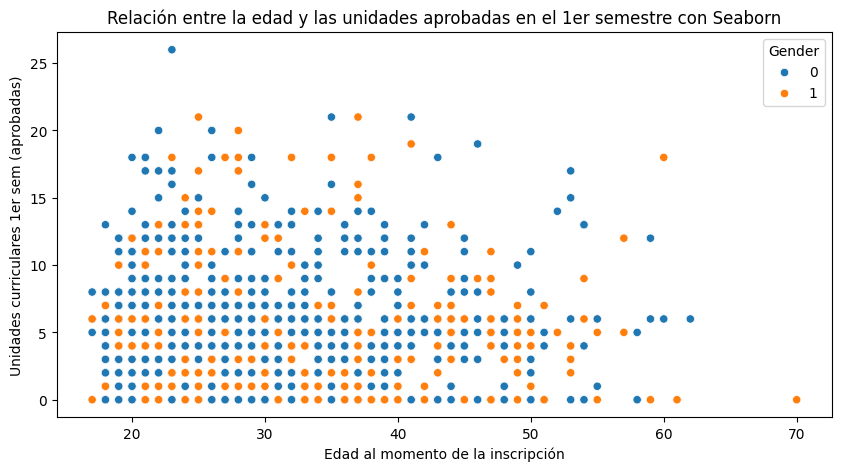

In [15]:
# Seaborn: Bivariado
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age at enrollment', y='Curricular units 1st sem (approved)', hue='Gender', data=df)
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Unidades curriculares 1er sem (aprobadas)')
plt.title('Relación entre la edad y las unidades aprobadas en el 1er semestre con Seaborn')
plt.show()

# Interpretación:

* No se puede confirmar la hipotesis planteada.
* A pesar de mostrar algunos casos de alumnos de mayor edad que no aprobaron materias, la distribución acompaña a la cantidad de alumnos de las distintas edades, por lo que no puede compararse apropiadamente el punto en cuestión

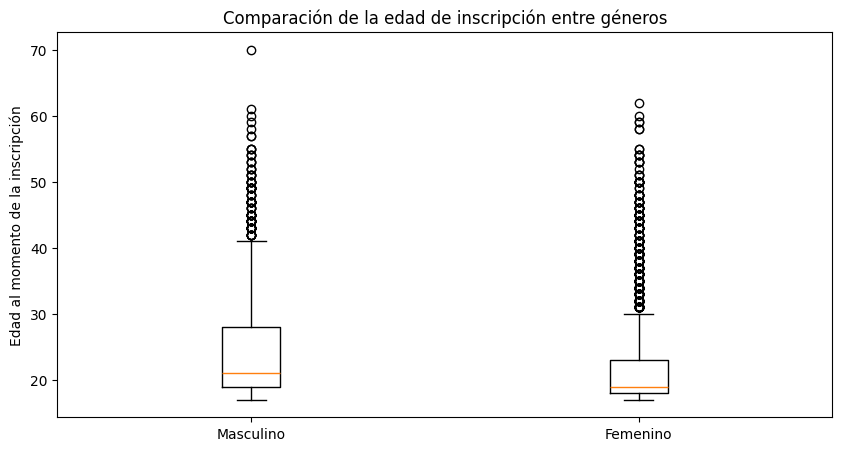

In [16]:
# Matplotlib: Libre elección
plt.figure(figsize=(10, 5))
plt.boxplot([df[df['Gender'] == 1]['Age at enrollment'], df[df['Gender'] == 0]['Age at enrollment']], labels=['Masculino', 'Femenino'])
plt.ylabel('Edad al momento de la inscripción')
plt.title('Comparación de la edad de inscripción entre géneros')
plt.show()

In [17]:
# Antes de correr ejecutar la matriz de correlación
# Codifico la variable objetivo 'Target' Usando LabelEncoder
label_encoder = LabelEncoder()
df['Target_Encoded'] = label_encoder.fit_transform(df['Target'])

# Verifico
print(df['Target'].value_counts())
print(label_encoder.classes_)

#Imprimo la cabecera para verificar el cambio realizado
print(df[['Target', 'Target_Encoded']].head())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
['Dropout' 'Enrolled' 'Graduate']
     Target  Target_Encoded
0   Dropout               0
1  Graduate               2
2   Dropout               0
3  Graduate               2
4  Graduate               2


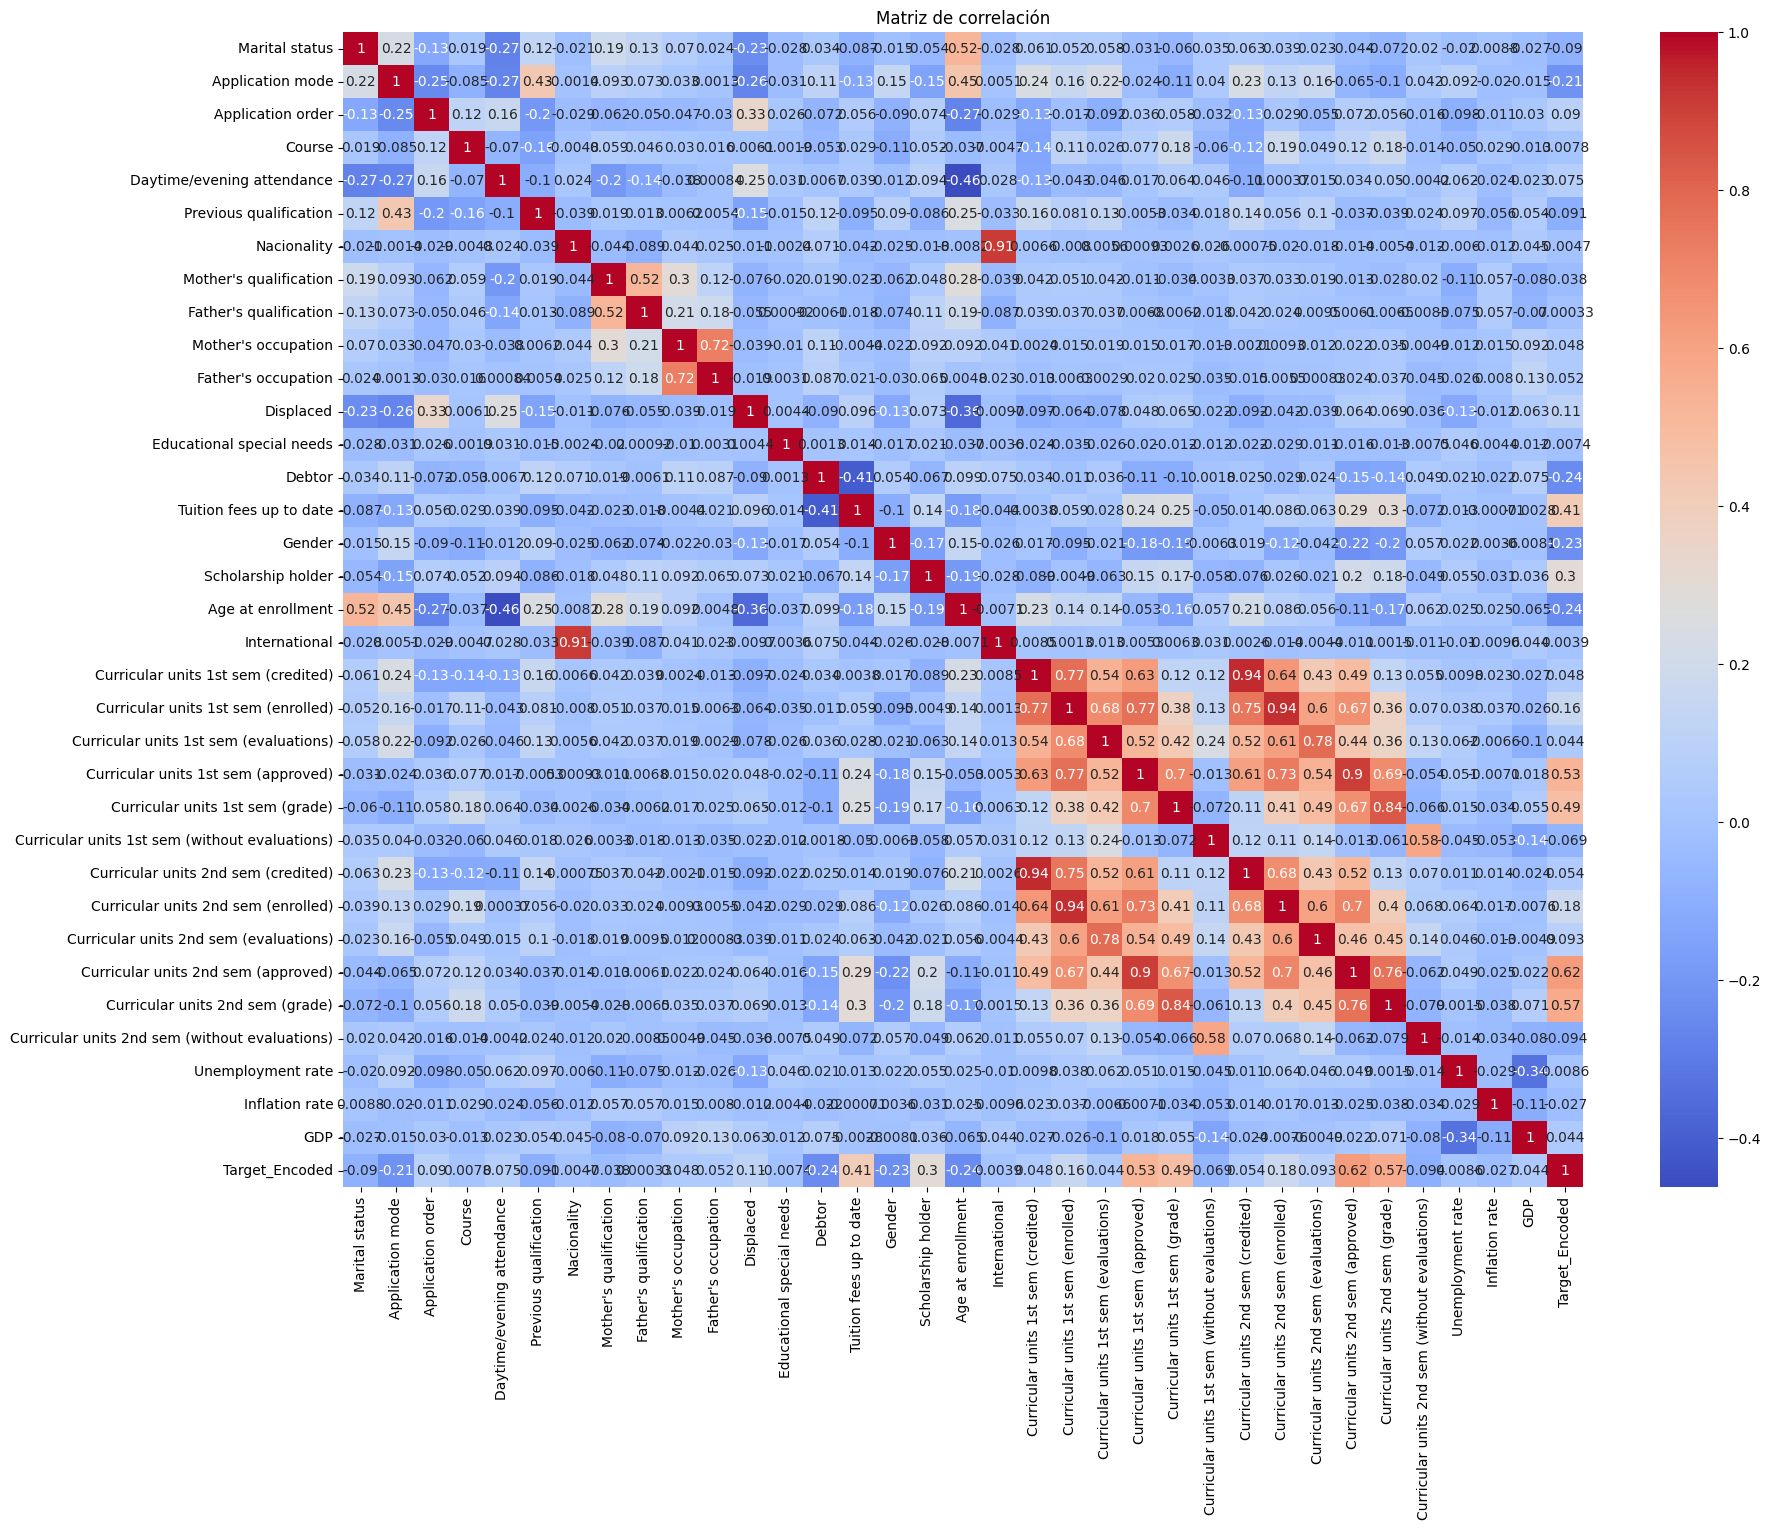

In [19]:
# Seaborn: Matriz de correlacion

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Corregimos los nombres de algunas columnas que contienen caracteres especiales (') que no permiten separar algunas columnas correctamente**

In [20]:
nuevos_nombres_columna = {'Mother\'s qualification' : 'Mothers qualification',
    'Father\'s qualification' : 'Father qualification',
    'Mother\'s occupation' : 'Mothers occupation',
    'Father\'s occupation' : 'Father occupation' }
df = df.rename(columns=nuevos_nombres_columna)



In [21]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Father qualification', 'Mothers occupation',
       'Father occupation', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Un

# Desarrollo y Evaluación de Modelos Predictivos
Se intentará probar mediante un modelo predictivo supervisado (regresión lineal), la hipótesis planteada anteriormente.
Tambien se comparará el resultado con un arbol de decisión

Se entrenará un modelo que intentará predecir la posibilidad de que los estudiantes sigan en la univerdidad o dejen la carrera (Target) basandose en las variables mas relevantes.
Se mostrará el desempeñoutilizando un gráfico y algunas métricas de error. Esto nos permitirá comprobar si existe una relación significativa entre las variables y cómo se puede predecir.

**Selección de variables predictoras usando Backward Selection:**

Variables seleccionadas y su correlación con Target_Encoded, ordenadas de mayor a menor:
Curricular units 2nd sem (approved): 0.6242
Curricular units 1st sem (approved): 0.5291
Tuition fees up to date: 0.4098
Scholarship holder: 0.2976
Debtor: 0.2410
Gender: 0.2293
Curricular units 2nd sem (enrolled): 0.1758
Curricular units 1st sem (enrolled): 0.1560
Curricular units 2nd sem (evaluations): 0.0927
Previous qualification: 0.0914
Marital status: 0.0898
Daytime/evening attendance: 0.0751
Curricular units 1st sem (without evaluations): 0.0687
Curricular units 2nd sem (credited): 0.0540
Mothers occupation: 0.0484
Curricular units 1st sem (credited): 0.0481
Curricular units 1st sem (evaluations): 0.0444
GDP: 0.0441
Unemployment rate: 0.0086
Course: 0.0078
International: 0.0039
Father qualification: 0.0003


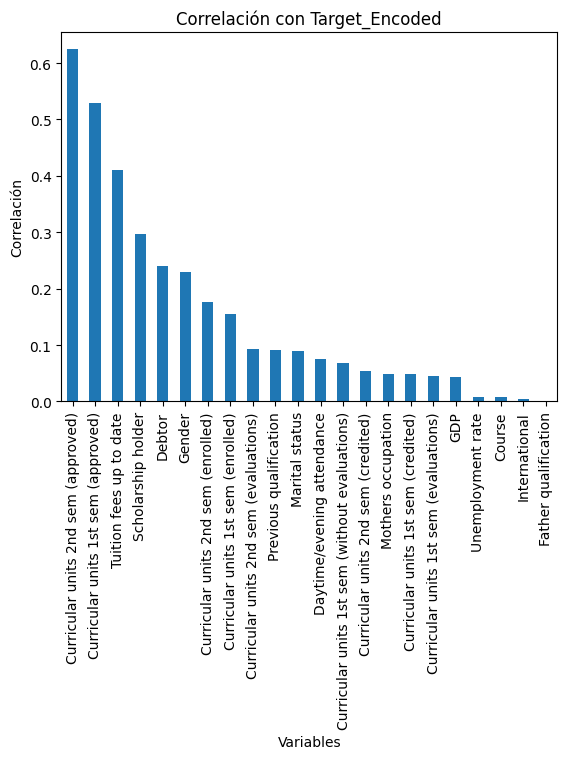

In [22]:
# Mantener solo las columnas numéricas
numerical_df = df.select_dtypes(include='number')

# Separar las variables predictoras y la variable objetivo
y = numerical_df['Target_Encoded']  # Variable objetivo
X = numerical_df.drop(columns=['Target_Encoded'])  # Variables predictoras

# Función para backward selection
def backward_selection(X, y, significance_level=0.06):
    initial_vars = X.columns.tolist()
    while len(initial_vars) > 0:
        # Use sm.OLS here
        model = sm.OLS(y, X[initial_vars]).fit()
        # Obtener la p-valor máximo entre las variables actuales
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            excluded_var = model.pvalues.idxmax()
            initial_vars.remove(excluded_var)
        else:
            break
    return initial_vars

# Ejecutar la selección hacia atrás
selected_vars = backward_selection(X, y)

# Remover 'const' si está en las variables seleccionadas
if 'const' in selected_vars:
    selected_vars.remove('const')

# Calcular la correlación con 'Target_Encoded' para las variables seleccionadas y ordenarlas
correlation_with_Target_Encoded = numerical_df[selected_vars].corrwith(numerical_df['Target_Encoded']).abs()
correlation_sorted = correlation_with_Target_Encoded.sort_values(ascending=False)

# Mostrar la lista ordenada de variables seleccionadas
print("Variables seleccionadas y su correlación con Target_Encoded, ordenadas de mayor a menor:")
for var, corr in correlation_sorted.items():
    print(f"{var}: {corr:.4f}")

# Graficar la correlación de las variables seleccionadas con 'Target_Encoded'
correlation_sorted.plot(kind='bar', title='Correlación con Target_Encoded')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()


In [23]:
# Filtrar las columnas de interés (Target_Encoded y las seleccionadas)
df_reducido = df[['Target_Encoded', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Scholarship holder', 'Debtor', 'Gender']]

# Definir las variables
x = df_reducido.drop('Target_Encoded', axis=1) # variables predictoras elegidas en base a la función backward Selection y la correlacion de las variables con Target_Encoded
y = df_reducido['Target_Encoded'] #Variable objetivo


In [24]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# Escalar características- columnas normales por el standard y la que no son normales van por el robustscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Changed X_train to x_train
X_test_scaled = scaler.transform(x_test) # Changed X_test to x_test

In [26]:
# Crear y entrenar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de datos de pruebas
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4500801679361259


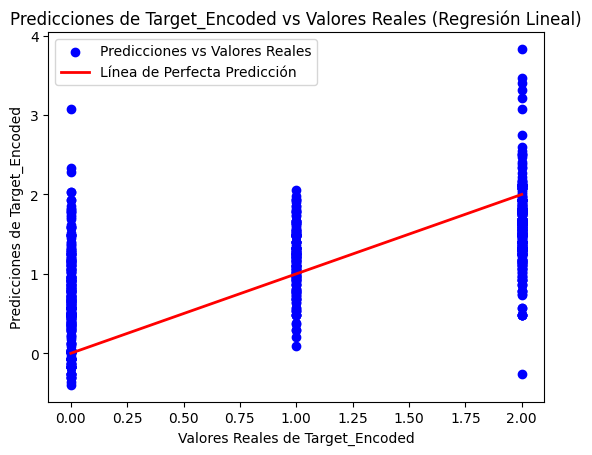

Error cuadrático medio (MSE): 0.4500801679361259
Error absoluto medio (MAE): 0.5341657839821791
Coeficiente de determinación (R²): 0.44849536827813474


In [27]:
# Evaluar la precisión del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizar la relación entre las predicciones y los valores reales
plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de Perfecta Predicción')
plt.title('Predicciones de Target_Encoded vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales de Target_Encoded')
plt.ylabel('Predicciones de Target_Encoded')
plt.legend()
plt.show()


print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2}")

In [28]:
# Hago una prueba con otro modelo como RandomForestRegressor para comparar
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 0.4048465699515788
Error absoluto medio (MAE): 0.4381192228016393
Coeficiente de determinación (R²): 0.5039222468102785


# Descripción del comportamiento del modelo predictivo:


**Descripción del comportamiento del modelo predictivo**

**Contexto:** Se han entrenado dos modelos de regresión (Regresión Lineal y Random Forest Regressor) para predecir la variable 'Target_Encoded', que probablemente representa si un estudiante continúa sus estudios o los abandona. Las métricas de evaluación que has calculado proporcionan información sobre el rendimiento de cada modelo.

**Métricas:**

* **Error Cuadrático Medio (MSE):** Mide la diferencia media cuadrática entre los valores predichos y los valores reales. Un MSE más bajo indica un mejor rendimiento del modelo, ya que implica errores de predicción menores.
    * **Interpretación:** Ambos modelos tienen un MSE alrededor de 0.40, con Random Forest mostrando un rendimiento ligeramente mejor.
* **Error Absoluto Medio (MAE):** Mide la diferencia absoluta media entre los valores predichos y los valores reales. Al igual que el MSE, un MAE más bajo es mejor.
    * **Interpretación:** Ambos modelos tienen un MAE alrededor de 0.43, con Random Forest mostrando nuevamente un rendimiento ligeramente mejor.

* **Coeficiente de Determinación (R²):** Representa la proporción de la varianza en la variable dependiente (Target_Encoded) que es predecible a partir de las variables independientes (características seleccionadas). Un valor de R² de 1 indica un ajuste perfecto, mientras que 0 significa que el modelo no explica ninguna varianza.
    * **Interpretación:** Ambos modelos tienen un R² alrededor de 0.50. Esto sugiere que aproximadamente el 50% de la varianza en los resultados de los estudiantes (Target_Encoded) puede ser explicada por las características seleccionadas en los modelos.
* **Gráfico de Dispersión:** Muestra graficamente como el modelo predictivo funcionó respescto de los valores reales.
    * **Interpretación**  El grafico de dispersión muestra que aunque el R² este cerca del 50%, la línea de predicción no acompaña a los valores reales
    
**Interpretación General**

* **Rendimiento Moderado:** Los valores de R² sugieren que ambos modelos tienen una capacidad predictiva moderada. Pueden explicar una parte de la varianza en los resultados de los estudiantes, pero aún hay una cantidad significativa de variabilidad sin explicar.
* **Margen de Mejora:** Un R² de alrededor de 0.50 indica que hay potencial para mejorar el poder predictivo de los modelos mediante:
    * **Añadir características más relevantes:** Explorar otras características dentro de tu conjunto de datos que puedan ser predictores importantes de los resultados de los estudiantes.
    * **Ingeniería de Características:** Crear nuevas características que capturen interacciones entre las variables existentes. Esto fue dificil de realizar dado que el dataset, si bien eran todas variables representadas numericamente, eran caracteristicascategoricas. Por ese motivo no se pudo realizar operaciones para generar nuevas caracteristicas.
    * **Ajuste de Parámetros del Modelo:** Optimizar los parámetros de los modelos (por ejemplo, para Random Forest, ajustar el número de árboles, la profundidad máxima, etc.).
    * **Explorar Diferentes Modelos:** Considerar probar otros tipos de modelos de regresión (por ejemplo, Máquinas de Soporte Vectorial, Gradient Boosting) para ver si ofrecen mejores resultados.

**Análisis Adicional**

* **Importancia de Características:** Especialmente para Random Forest, analizar los puntajes de importancia de las características para entender qué variables son más influyentes en la predicción de los resultados de los estudiantes. Esto nos dió información valiosa sobre los factores que están impulsando el éxito y la retención de los estudiantes. Sin embargo en nuesto caso la correlación era relativamente baja entre el la variable objetivo y las demas. Se deberían agregar nuevas variables al data set.
* **Análisis de Residuales:** Examinar los residuales (la diferencia entre los valores predichos y los valores reales) para ver si hay patrones o tendencias que podrían sugerir mejoras adicionales a los modelos.


# Conclusión

En conclusión, dados los dato sobtenidos desl dataset, y los modelos utilizados, no se puede confirmar la hipótesis que sosteniá que caracteristicas como la edad o género, si tenian deuda, o los horarios de cursada dado que ninguno de ellos tiene un correlación determinante.
La mayor correlación se dio con 'Curricular units 2nd sem (approved)', pero era solo de 0.62.

Aunque los modelos utilizados tienen una capacidad predictiva moderada, todavía hay margen para la mejora. Considerando cuidadosamente la importancia de las características, realizando un análisis más detallado de los resultados y considerando técnicas de modelos avanzados, potencialmente se pueden desarrollar modelos más precisos para entender y predecir los resultados de los estudiantes.

